In [53]:
%matplotlib inline
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
cityData.head()
rideData = pd.read_csv(ride_data_to_load)
rideData.head()

# Combine the data into a single dataset
ride_city_df = pd.merge(rideData, cityData, on ="city")

# Display the data table for preview
ride_city_df.head()
#ride_city_df["type"].head()
#type(ride_city_df)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [60]:
# Split into 3 separate dataframe, one for each city type
Rural_df = ride_city_df.loc[ride_city_df["type"] =="Rural"]
Suburban_df = ride_city_df.loc[ride_city_df["type"] =="Suburban"]
Urban_df = ride_city_df.loc[ride_city_df["type"] =="Urban"]

# x-axis is the number of rides per city
# circle size is the driver count per city
# y-axis is the Average fare

# Group Rural City type list by City 
groupByRuralCity = Rural_df.groupby(["city"])
RuralCity_df = pd.DataFrame({'Total Number of Rides' : Rural_df.groupby(["city"] ).size()})
RuralCity_df["Total Fare"] = pd.DataFrame( groupByRuralCity["fare"].sum() )
RuralCity_df["Average Fare"] = round(RuralCity_df["Total Fare"] / RuralCity_df["Total Number of Rides"], 2)
RuralCity_df["driver_count"] = pd.DataFrame( groupByRuralCity["driver_count"].mean())

maxRuralRide = RuralCity_df["Total Number of Rides"].max()

RuralCity_df
#type(RuralCity_df)

,Total Number of Rides,Total Fare,Average Fare,driver_count
city,,,,
Bradshawfurt,10,400.64,40.06,7
Garzaport,3,72.37,24.12,7
Harringtonfort,6,200.82,33.47,4
Jessicaport,6,216.08,36.01,1
Lake Jamie,6,206.15,34.36,4
Lake Latoyabury,11,286.68,26.06,2
Michaelberg,12,419.97,35.00,6
New Ryantown,6,259.67,43.28,2
Newtonview,4,146.98,36.75,1


In [55]:
# Group Suburban City type list by City 
groupBySuburbanCity = Suburban_df.groupby(["city"])
SuburbanCity_df = pd.DataFrame({'Total Number of Rides' : Suburban_df.groupby(["city"] ).size()})
SuburbanCity_df["Total Fare"] = pd.DataFrame( groupBySuburbanCity["fare"].sum() )
SuburbanCity_df["Average Fare"] = round(SuburbanCity_df["Total Fare"] / SuburbanCity_df["Total Number of Rides"], 2)
SuburbanCity_df["driver_count"] = pd.DataFrame( groupBySuburbanCity["driver_count"].mean())

maxSuburbanRide = SuburbanCity_df["Total Number of Rides"].max()
maxSuburbanRide
SuburbanCity_df.head()
# type(SuburbanCity_df)


,Total Number of Rides,Total Fare,Average Fare,driver_count
city,,,,
Barronchester,16,582.76,36.42,11
Bethanyland,18,593.21,32.96,22
Brandonfort,19,673.31,35.44,10
Colemanland,22,679.68,30.89,23
Davidfurt,17,543.93,32.00,23


In [17]:
# Group Urban City type list by City 
groupByUrbanCity = Urban_df.groupby(["city"])
UrbanCity_df = pd.DataFrame({'Total Number of Rides' : Urban_df.groupby(["city"] ).size()})
UrbanCity_df["Total Fare"] = pd.DataFrame( groupByUrbanCity["fare"].sum() )
UrbanCity_df["Average Fare"] = round(UrbanCity_df["Total Fare"] / UrbanCity_df["Total Number of Rides"], 2)
UrbanCity_df["driver_count"] = pd.DataFrame( groupByUrbanCity["driver_count"].mean())

maxUrbanRide = SuburbanCity_df["Total Number of Rides"].max()
#maxUrbanRide
UrbanCity_df.head()
# type(SuburbanCity_df)

,Total Number of Rides,Total Fare,Average Fare,driver_count
city,,,,
Amandaburgh,18,443.55,24.64,12
Barajasview,22,557.31,25.33,26
Carriemouth,27,764.49,28.31,52
Christopherfurt,27,661.55,24.50,41
Deanville,19,491.01,25.84,49


In [18]:
#  get x-axis list for Rural City
x_axis_Rural = RuralCity_df.loc[:, "Total Number of Rides"].tolist()
# x_axis_Rural
# print(len(x_axis_Rural))

#  get x-axis list for Suburban City
x_axis_Suburban = SuburbanCity_df.loc[:, "Total Number of Rides"].tolist()
x_axis_Suburban
print(len(x_axis_Suburban))

#  get x-axis list for Urban City
x_axis_Urban = UrbanCity_df.loc[:, "Total Number of Rides"].tolist()
x_axis_Urban
print(len(x_axis_Urban))

36
66


In [19]:
# get y-axis list for Rural City
y_axis_Rural = RuralCity_df.loc[:, "Average Fare"].tolist()
#y_axis_Rural
#print (len(y_axis_Rural))

# get y-axis list for Suburban City
y_axis_Suburban = SuburbanCity_df.loc[:, "Average Fare"].tolist()
y_axis_Suburban

y_axis_Suburban

#print (len(y_axis_Suburban))

# get y-axis list for Urban City
y_axis_Urban = UrbanCity_df.loc[:, "Average Fare"].tolist()
#y_axis_Urban
#print (len(y_axis_Urban))


In [20]:
#  size List for Rural City
size_R = RuralCity_df.loc[ :, "driver_count"].tolist()
print (len(size_R))
size_Rural = [ x *5  for x in size_R]
size_Rural

#  size List for Suburban City
size_S = SuburbanCity_df.loc[ :, "driver_count"].tolist()
print (len(size_S))
size_Suburban = [ x *5  for x in size_S]
size_Suburban


#  size List for Urban City
size_U = UrbanCity_df.loc[ :, "driver_count"].tolist()
print (len(size_U))
size_Urban = [ x *5 for x in size_U]
#size_Urban


18
36
66


In [21]:
#  max average fare
y_axis_Rural_limit = RuralCity_df[["Average Fare"]].max()
y_axis_Rural_limit

Average Fare    43.28
dtype: float64

## Bubble Plot of Ride Sharing Data

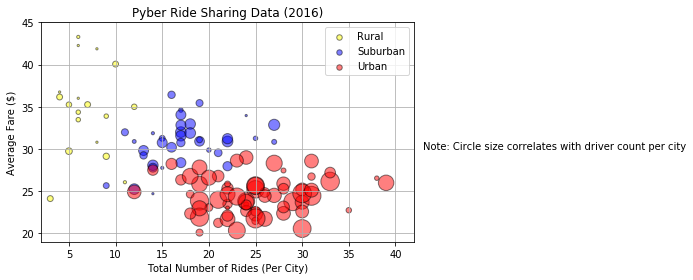

In [52]:
# Obtain the x and y coordinates for each of the three city types
# x-axis is the number of rides per city
# circle size is the driver count per city
# y-axis is the Average fair
# so need to do groupby within each City Type

# Build the scatter plots for each city types
plt.scatter(x_axis_Rural, y_axis_Rural, marker="o",facecolors="yellow", edgecolors="black",
            s=size_Rural, alpha=0.5, label="Rural")

plt.scatter(x_axis_Suburban, y_axis_Suburban, marker="o",facecolors="blue", edgecolors="black",
            s=size_Suburban, alpha=0.5, label="Suburban")

plt.scatter(x_axis_Urban, y_axis_Urban, marker="o",facecolors="red", edgecolors="black",
            s=size_Urban, alpha=0.5, label="Urban")

# Incorporate the other graph properties
plt.xlim(2, 42)
plt.ylim(19, 45)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend( scatterpoints=1 ,fontsize=8, title= "City Type")

# jc - this makes the buble size even on the legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30])

# alternative -  Plot legend.
#lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43, 30, r'Note: Circle size correlates with driver count per city')

plt.grid()
# need bbox_inches = "tight" to include plot text on the saved image. Otherwise it gets cut off
# it basically extends or shrinks the bounding box such that all objects in the canvas are displayed.
plt.savefig("Images/PyberScatterGraph.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

## Total Fares by City Type

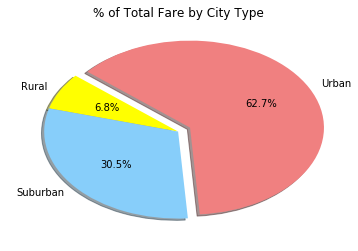

In [35]:
# Calculate Type Percents
ride_city_df.head()

CityTypes = ["Rural", "Suburban", "Urban"]
#TotalUrbanFare = UrbanCity_df["fare"].sum()

#totalUrbanFare = UrbanCity_df(["fare"]).sum()
RuralTotalFare = RuralCity_df["Total Fare"].sum()
#print(RuralTotalFare)

SuburbanTotalFare = SuburbanCity_df["Total Fare"].sum()
SuburbanTotalFare

UrbanTotalFare = UrbanCity_df["Total Fare"].sum()
#UrbanTotalFare

TotalFare = [RuralTotalFare, SuburbanTotalFare,  UrbanTotalFare]  

TotalFare
#ride_city_df.head()

#totalUrbanFare
# TotalUrbanFare

# Build Pie Char\\# Save Figure
# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)
plt.title("% of Total Fare by City Type")


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(TotalFare, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Images/PyberTotalFareByCityType.png")
plt.show()


## Total Rides by City Type

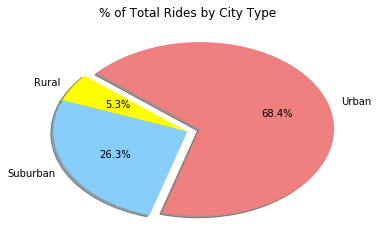

In [47]:
# Calculate Ride Percents
RuralTotalRide = RuralCity_df["Total Number of Rides"].sum()
#print(RuralTotalRide)

SuburbanTotalRide = SuburbanCity_df["Total Number of Rides"].sum()
#print(SuburbanTotalRide)

UrbanTotalRide = UrbanCity_df["Total Number of Rides"].sum()
#print(UrbanTotalRide)

TotalRide = [RuralTotalRide, SuburbanTotalRide,  UrbanTotalRide]  
#TotalRide

# Build Pie Chart
plt.title("% of Total Rides by City Type")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(TotalRide, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/PyberTotalRidesByCityType.png")
plt.show()


## Total Drivers by City Type

78


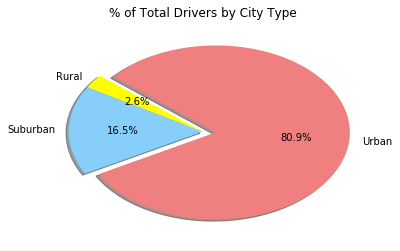

In [49]:
# Calculate Driver Percents
RuralTotalDriver = RuralCity_df["driver_count"].sum()
print(RuralTotalDriver)

SuburbanTotalDriver = SuburbanCity_df["driver_count"].sum()
#print(SuburbanTotalDriver)

UrbanTotalDriver = UrbanCity_df["driver_count"].sum()
#print(UrbanTotalDriver)

TotalDriver = [RuralTotalDriver, SuburbanTotalDriver,  UrbanTotalDriver]  
#TotalRide

# Build Pie Charts
plt.title("% of Total Drivers by City Type")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(TotalDriver, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/PyberTotalDriverByCityType.png")

# Show Figure
plt.show()
